# Trabalho de Visualização de Dados

TRABALHO DE VISUALIZAÇÃO DE DADOS
. APRESENTAÇÃO DA EQUIPE
. APRESENTAÇÃO DO DATASET UITILIZADO
. DESCREVENDO O PROBLEMA Ex.: O Rank dos 10 melhores países por produto
. DESCREVENDO A SOLUÇÃO	
	- Comparação (Samuel)
	- Relacionamento (Abner)
	- Distribuição (Wendel)
	- Composição (Emiliandro)
Implementar todos os gráficos ensinados na aula, porém apresentar apenas o que melhor se encaixa na solução.

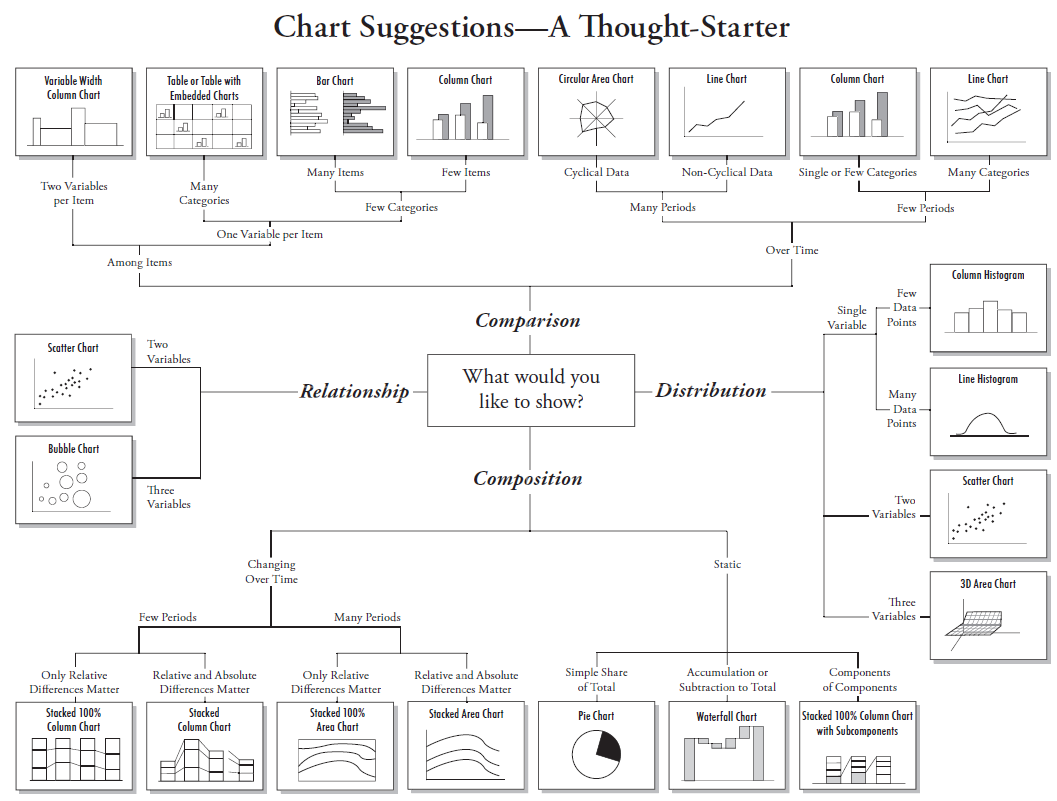

https://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf

# Importação de Bibliotecas e Dados

### Fonte de dados

##### https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos

##### https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-acidentes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from os import listdir
from os.path import isfile, join

In [2]:
%%time
files = [f for f in listdir(os.getcwd()) if isfile(join(os.getcwd(), f)) 
         and join(os.getcwd(), f)[-3:] == 'csv' 
         and f[:8] == 'datatran']
files

Wall time: 6 ms


['datatran2007.csv',
 'datatran2008.csv',
 'datatran2009.csv',
 'datatran2010.csv',
 'datatran2011.csv',
 'datatran2012.csv',
 'datatran2013.csv',
 'datatran2014.csv',
 'datatran2015.csv',
 'datatran2016.csv',
 'datatran2017.csv',
 'datatran2018.csv',
 'datatran2019.csv',
 'datatran2020.csv']

In [3]:
colunas_excluir = ['id','uso_solo','sentido_via','tipo_pista','tracado_via',
                   'ano','ignorados','horario','pessoas','veiculos',
                   'feridos_leves','feridos_graves','classificacao_acidente','municipio','uf',
                   'uop','delegacia','regional','latitude','longitude']

In [4]:
df_manaus = pd.DataFrame()

In [5]:
%%time
for f in files:
    df_temp = pd.DataFrame()
    df_temp = pd.read_csv(f, sep=';', low_memory=False)
    print("Arquivo: "+ f)
    df_temp = df_temp[df_temp['municipio'] == 'MANAUS'].copy()
    for coluna in colunas_excluir:
        if coluna in df_temp.columns:
            df_temp.drop(coluna, inplace=True, axis=1)
    df_manaus = pd.concat([df_manaus,df_temp])

Arquivo: datatran2007.csv
Arquivo: datatran2008.csv
Arquivo: datatran2009.csv
Arquivo: datatran2010.csv
Arquivo: datatran2011.csv
Arquivo: datatran2012.csv
Arquivo: datatran2013.csv
Arquivo: datatran2014.csv
Arquivo: datatran2015.csv
Arquivo: datatran2016.csv
Arquivo: datatran2017.csv
Arquivo: datatran2018.csv
Arquivo: datatran2019.csv
Arquivo: datatran2020.csv
Wall time: 6.41 s


## Criando o Dataframe Manaus

In [6]:
df_manaus.reset_index(inplace=True, drop=True)

In [7]:
df_manaus.head()

,data_inversa,dia_semana,br,km,causa_acidente,tipo_acidente,fase_dia,condicao_metereologica,mortos,ilesos,feridos
0,02/01/2007,Terça,174,9.3,Falta de atenção,Saída de Pista,Pleno dia,Chuva,0,0,1
1,02/01/2007,Terça,174,7.9,Outras,Colisão traseira,Anoitecer,Chuva,0,4,0
2,07/01/2007,Domingo,174,52.1,Defeito na via,Capotamento,Pleno dia,Sol,0,0,2
3,11/01/2007,Quinta,174,85.8,Outras,Incêndio,Anoitecer,Nevoeiro/neblina,0,1,0
4,19/01/2007,Sexta,174,3.3,Falta de atenção,Colisão lateral,Pleno dia,Ceu Claro,0,2,0


## Formatando Dataframe

### Convertendo tipos

In [8]:
df_manaus['tipo_acidente'] = df_manaus['tipo_acidente'].astype('category')
df_manaus['causa_acidente'] = df_manaus['causa_acidente'].astype('category')
df_manaus['data_inversa'] = df_manaus['data_inversa'].astype('datetime64')

In [9]:
df_manaus['km'].replace(',','.', regex=True, inplace=True)
df_manaus['km'] = df_manaus['km'].astype('float')

In [10]:
df_manaus.dropna(axis=0, inplace=True)

df_manaus['br'] = df_manaus['br'].astype('int32')

In [11]:
df_manaus['dia_semana'].replace('segunda-feira','segunda', regex=True,inplace=True)
df_manaus['dia_semana'].replace('terça-feira','terça', regex=True,inplace=True)
df_manaus['dia_semana'].replace('quarta-feira','quarta', regex=True,inplace=True)
df_manaus['dia_semana'].replace('quinta-feira','quinta', regex=True,inplace=True)
df_manaus['dia_semana'].replace('sexta-feira','sexta', regex=True,inplace=True)
df_manaus['dia_semana'].replace('sábado','sábado', regex=True,inplace=True)
df_manaus['dia_semana'].replace('domingo','domingo', regex=True,inplace=True)
df_manaus['dia_semana'] = df_manaus['dia_semana'].str.lower()

df_manaus['dia_semana'] = df_manaus['dia_semana'].astype('category')

In [12]:
df_manaus['condicao_metereologica'].replace('Céu Claro','ceu claro', inplace = True)
df_manaus['condicao_metereologica'].replace('Ignorada','ignorado', inplace = True)
df_manaus['condicao_metereologica'] = df_manaus['condicao_metereologica'].str.lower()

df_manaus['condicao_metereologica'] = df_manaus['condicao_metereologica'].astype('category')

In [13]:
df_manaus['fase_dia'] = df_manaus['fase_dia'].str.lower()

df_manaus['fase_dia'] = df_manaus['fase_dia'].astype('category')

In [14]:
df_manaus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345 entries, 0 to 1345
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   data_inversa            1345 non-null   datetime64[ns]
 1   dia_semana              1345 non-null   category      
 2   br                      1345 non-null   int32         
 3   km                      1345 non-null   float64       
 4   causa_acidente          1345 non-null   category      
 5   tipo_acidente           1345 non-null   category      
 6   fase_dia                1345 non-null   category      
 7   condicao_metereologica  1345 non-null   category      
 8   mortos                  1345 non-null   int64         
 9   ilesos                  1345 non-null   int64         
 10  feridos                 1345 non-null   int64         
dtypes: category(5), datetime64[ns](1), float64(1), int32(1), int64(3)
memory usage: 78.1 KB


# Salvando

In [15]:
df_manaus

,data_inversa,dia_semana,br,km,causa_acidente,tipo_acidente,fase_dia,condicao_metereologica,mortos,ilesos,feridos
0,2007-02-01,terça,174,9.3,Falta de atenção,Saída de Pista,pleno dia,chuva,0,0,1
1,2007-02-01,terça,174,7.9,Outras,Colisão traseira,anoitecer,chuva,0,4,0
2,2007-07-01,domingo,174,52.1,Defeito na via,Capotamento,pleno dia,sol,0,0,2
3,2007-11-01,quinta,174,85.8,Outras,Incêndio,anoitecer,nevoeiro/neblina,0,1,0
4,2007-01-19,sexta,174,3.3,Falta de atenção,Colisão lateral,pleno dia,ceu claro,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1341,2020-12-07,segunda,174,967.0,Falta de Atenção à Condução,Capotamento,pleno dia,chuva,0,0,1
1342,2020-12-08,terça,174,941.2,Defeito na Via,Tombamento,anoitecer,nublado,0,0,1
1343,2020-12-09,quarta,174,899.0,Falta de Atenção à Condução,Colisão transversal,pleno dia,chuva,1,1,0
1344,2020-12-21,segunda,174,947.0,Falta de Atenção à Condução,Saída de leito carroçável,plena noite,ceu claro,0,2,0


In [16]:
df_manaus.to_csv("2007_2020_Manaus.csv", sep=";", index=False)

-----------

# Gráficos

## Comparação

## Relacionamento

### Scatter Chart

In [17]:
df_manaus.head()

,data_inversa,dia_semana,br,km,causa_acidente,tipo_acidente,fase_dia,condicao_metereologica,mortos,ilesos,feridos
0,2007-02-01,terça,174,9.3,Falta de atenção,Saída de Pista,pleno dia,chuva,0,0,1
1,2007-02-01,terça,174,7.9,Outras,Colisão traseira,anoitecer,chuva,0,4,0
2,2007-07-01,domingo,174,52.1,Defeito na via,Capotamento,pleno dia,sol,0,0,2
3,2007-11-01,quinta,174,85.8,Outras,Incêndio,anoitecer,nevoeiro/neblina,0,1,0
4,2007-01-19,sexta,174,3.3,Falta de atenção,Colisão lateral,pleno dia,ceu claro,0,2,0


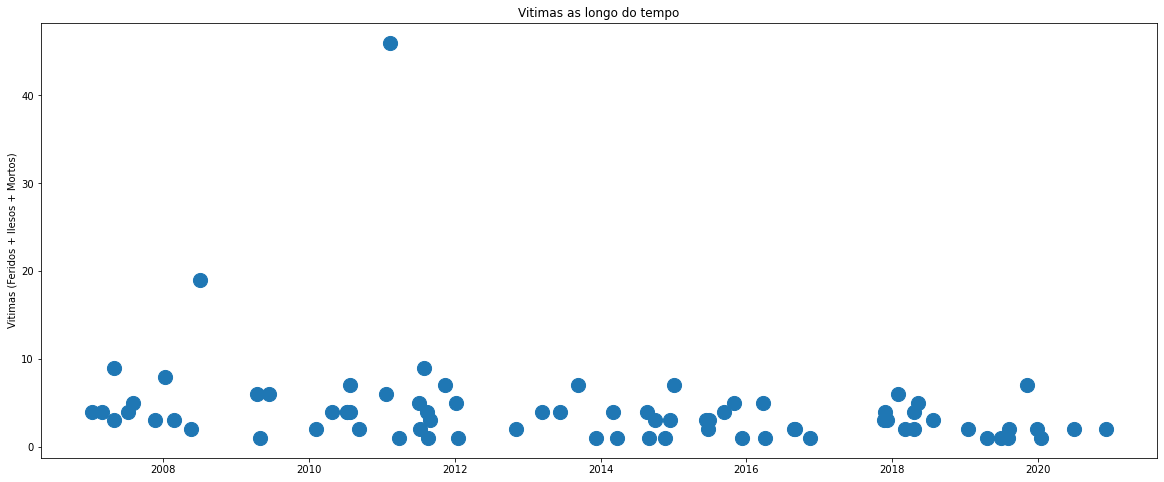

In [18]:
df_temp = df_manaus[df_manaus['mortos'] > 0]

y = df_temp['ilesos'] + df_temp['mortos'] + df_temp['feridos']
x = df_temp['data_inversa']

plt.figure(figsize=(20,8))
plt.scatter(x, y, s=200)
plt.title('Vitimas as longo do tempo')
plt.ylabel('Vitimas (Feridos + Ilesos + Mortos)')
plt.xlabel('')
plt.show()

In [19]:
df_manaus['ano'] = df_manaus['data_inversa'].dt.year
df_ano = df_manaus.groupby('ano').agg({'mortos':np.sum,'ilesos':np.sum,'feridos':np.sum}).sort_index()
df_ano['vitimas'] = df_ano['mortos'] + df_ano['ilesos'] + df_ano['feridos']
df_ano.reset_index(inplace=True)

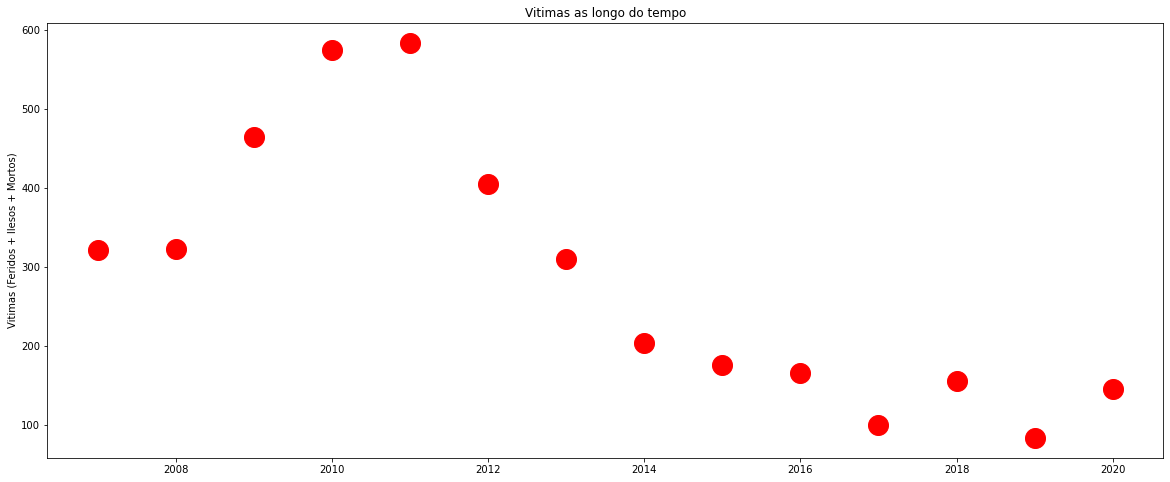

In [20]:
y = df_ano['vitimas']
x = df_ano['ano']

plt.figure(figsize=(20,8))
plt.scatter(x, y, s=400,c='red')
plt.title('Vitimas as longo do tempo')
plt.ylabel('Vitimas (Feridos + Ilesos + Mortos)')
plt.xlabel('')
plt.show()

In [34]:
df_manaus.head(2)

,data_inversa,dia_semana,br,km,causa_acidente,tipo_acidente,fase_dia,condicao_metereologica,mortos,ilesos,feridos,ano,mes
0,2007-02-01,terça,174,9.3,Falta de atenção,Saída de Pista,pleno dia,chuva,0,0,1,2007,2
1,2007-02-01,terça,174,7.9,Outras,Colisão traseira,anoitecer,chuva,0,4,0,2007,2


In [37]:
df_fase_do_dia = df_manaus.groupby(['ano','fase_dia']).agg({'mortos':np.sum,'ilesos':np.sum,'feridos':np.sum}).sort_index()
df_fase_do_dia['vitimas'] = df_fase_do_dia['mortos'] + df_fase_do_dia['ilesos'] + df_fase_do_dia['feridos']
df_fase_do_dia.reset_index(inplace=True)
df_fase_do_dia

,ano,fase_dia,mortos,ilesos,feridos,vitimas
0,2007,amanhecer,0,1,1,2
1,2007,anoitecer,2,22,19,43
2,2007,plena noite,2,41,26,69
3,2007,pleno dia,4,144,59,207
4,2008,amanhecer,0,4,2,6
5,2008,anoitecer,0,14,4,18
6,2008,plena noite,1,31,16,48
7,2008,pleno dia,5,154,91,250
8,2009,amanhecer,0,8,0,8
9,2009,anoitecer,0,12,1,13


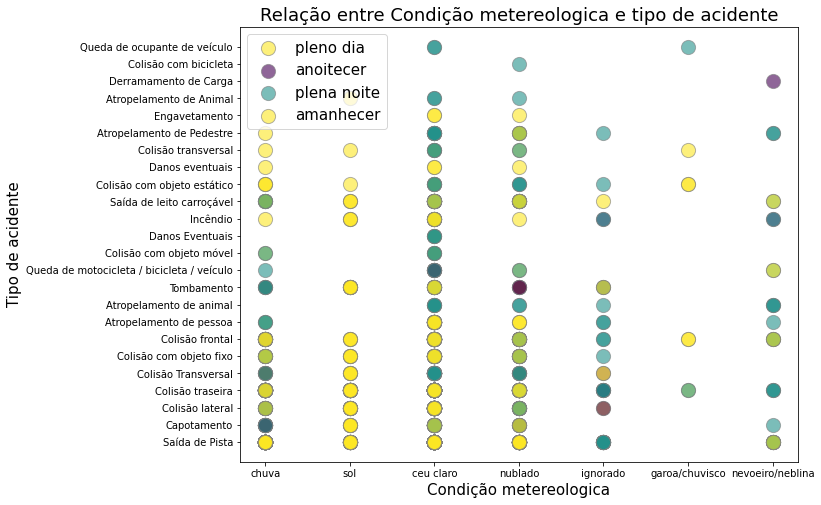

In [25]:
legenda = df_manaus['fase_dia'].unique()

plt.figure(figsize=(10,8))

colors=['#440154', '#23918B', '#FDE724']
labels=df_manaus['fase_dia'].unique()

for i, label in enumerate(labels):
    df_temp = df_manaus[df_manaus['fase_dia']==label]
    x = df_temp['condicao_metereologica']
    y = df_temp['tipo_acidente']
    plt.scatter(x, y, 
                s=200,
                c=colors[i-1],
                #cmap='viridis',
                linewidth=1,
                alpha=.6,
                edgecolors='grey',
                label=label
               )
plt.legend(loc='upper left',
           fontsize=15
          )
plt.title('Relação entre Condição metereologica e tipo de acidente', 
          fontsize=18
         )
plt.ylabel('Tipo de acidente', fontsize=15)
plt.xlabel('Condição metereologica', fontsize=15)
plt.show()

In [ ]:
df_semanal = df['dia_semana'].value_counts().reset_index()

df_semanal.reindex([0,3,4,5,6,2,1])

df_semanal.reset_index(drop=True, inplace=True)

df_semanal.columns=['dia_semana','total_acidentes']

df_semanal

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df_semanal['dia_semana'],df_semanal['total_acidentes'])

plt.show()

In [46]:
df_manaus.head()

,data_inversa,dia_semana,br,km,causa_acidente,tipo_acidente,fase_dia,condicao_metereologica,mortos,ilesos,feridos
0,2007-02-01,terça,174,9.3,Falta de atenção,Saída de Pista,pleno dia,chuva,0,0,1
1,2007-02-01,terça,174,7.9,Outras,Colisão traseira,anoitecer,chuva,0,4,0
2,2007-07-01,domingo,174,52.1,Defeito na via,Capotamento,pleno dia,sol,0,0,2
3,2007-11-01,quinta,174,85.8,Outras,Incêndio,anoitecer,nevoeiro/neblina,0,1,0
4,2007-01-19,sexta,174,3.3,Falta de atenção,Colisão lateral,pleno dia,ceu claro,0,2,0


### Bubble Chart

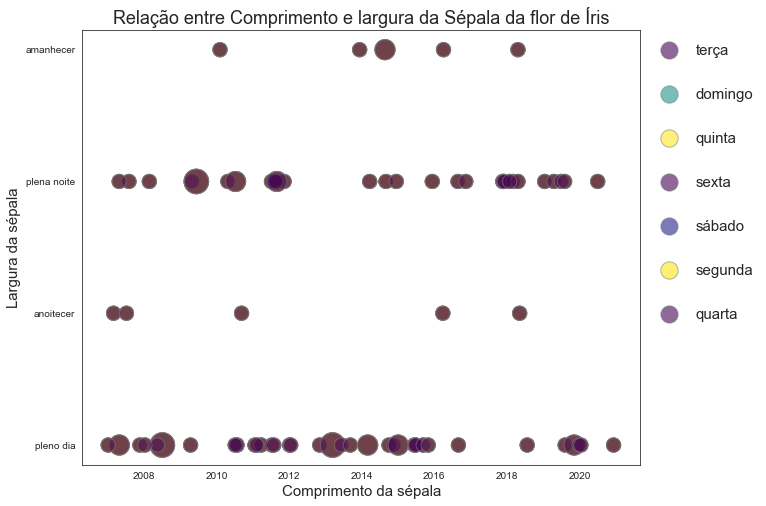

In [52]:
colors=['#440154', '#23918B', '#FDE724','#440354', '#23218B', '#FDE714','#440554', '#24918B', '#FDE824',]
labels=df_manaus['dia_semana'].unique()

#sns.set_style("whitegrid")
sns.set_style("white")
plt.figure(figsize=(10,8))

for i, label in enumerate(labels):
    df_temp = df_manaus[df_manaus['dia_semana']==label]
    x = df_manaus['data_inversa']
    y = df_manaus['fase_dia']
    sizes = df_manaus['mortos']
    
    plt.scatter(x, y, 
                s=200 * sizes,
                c=colors[i],
                #cmap='viridis',
                linewidth=1,
                alpha=.6,
                edgecolors='grey',
                label=label
               )
plt.legend(loc='upper left', labelspacing=2,
           fontsize=15,
           bbox_to_anchor=(1,1), frameon=False,
          )
plt.title('Relação entre Comprimento e largura da Sépala da flor de Íris', 
          fontsize=18
         )
plt.ylabel('Largura da sépala', fontsize=15)
plt.xlabel('Comprimento da sépala', fontsize=15)
plt.show()

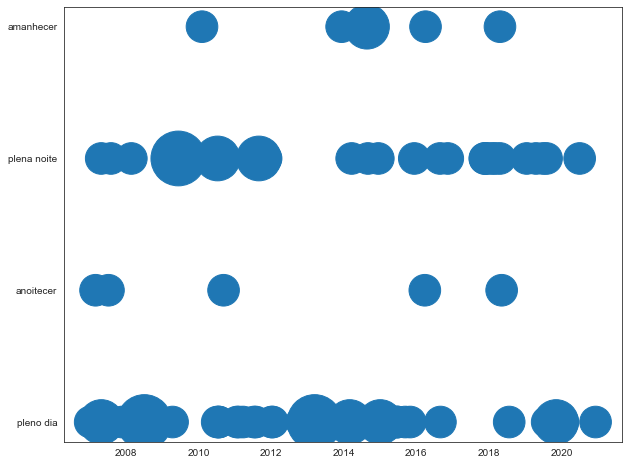

In [57]:
plt.figure(figsize=(10,8))
x = df_manaus['data_inversa']
y = df_manaus['fase_dia']
z = df_manaus['mortos']
colors = np.random.rand(1345) 
plt.scatter(x, y, s=z*1000)
plt.show()

In [53]:
df_manaus.head()

,data_inversa,dia_semana,br,km,causa_acidente,tipo_acidente,fase_dia,condicao_metereologica,mortos,ilesos,feridos
0,2007-02-01,terça,174,9.3,Falta de atenção,Saída de Pista,pleno dia,chuva,0,0,1
1,2007-02-01,terça,174,7.9,Outras,Colisão traseira,anoitecer,chuva,0,4,0
2,2007-07-01,domingo,174,52.1,Defeito na via,Capotamento,pleno dia,sol,0,0,2
3,2007-11-01,quinta,174,85.8,Outras,Incêndio,anoitecer,nevoeiro/neblina,0,1,0
4,2007-01-19,sexta,174,3.3,Falta de atenção,Colisão lateral,pleno dia,ceu claro,0,2,0


## Distribuição

## Composição